In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

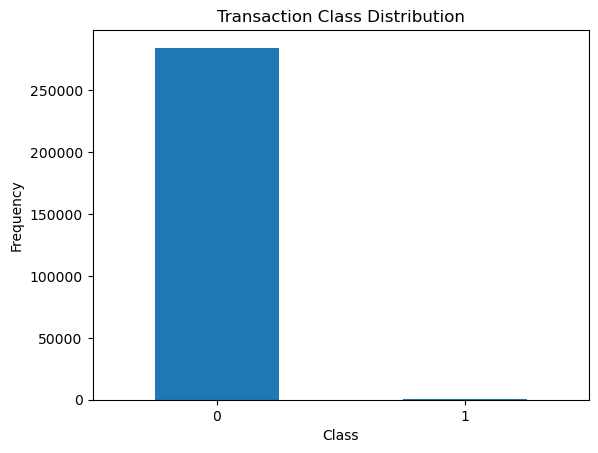

In [8]:
count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")



plt.xlabel("Class")

plt.ylabel("Frequency")

In [9]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>],
       [<Axes: title={'center': 'V5'}>, <Axes: title={'center': 'V6'}>,
        <Axes: title={'center': 'V7'}>, <Axes: title={'center': 'V8'}>,
        <Axes: title={'center': 'V9'}>],
       [<Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>,
        <Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>],
       [<Axes: title={'center': 'V15'}>, <Axes: title={'center': 'V16'}>,
        <Axes: title={'center': 'V17'}>, <Axes: title={'center': 'V18'}>,
        <Axes: title={'center': 'V19'}>],
       [<Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>,
        <Axes: title={'center': 'V24'}>],
       [<Axes: title={'center': 'V25'}>, <Axes: title={'ce

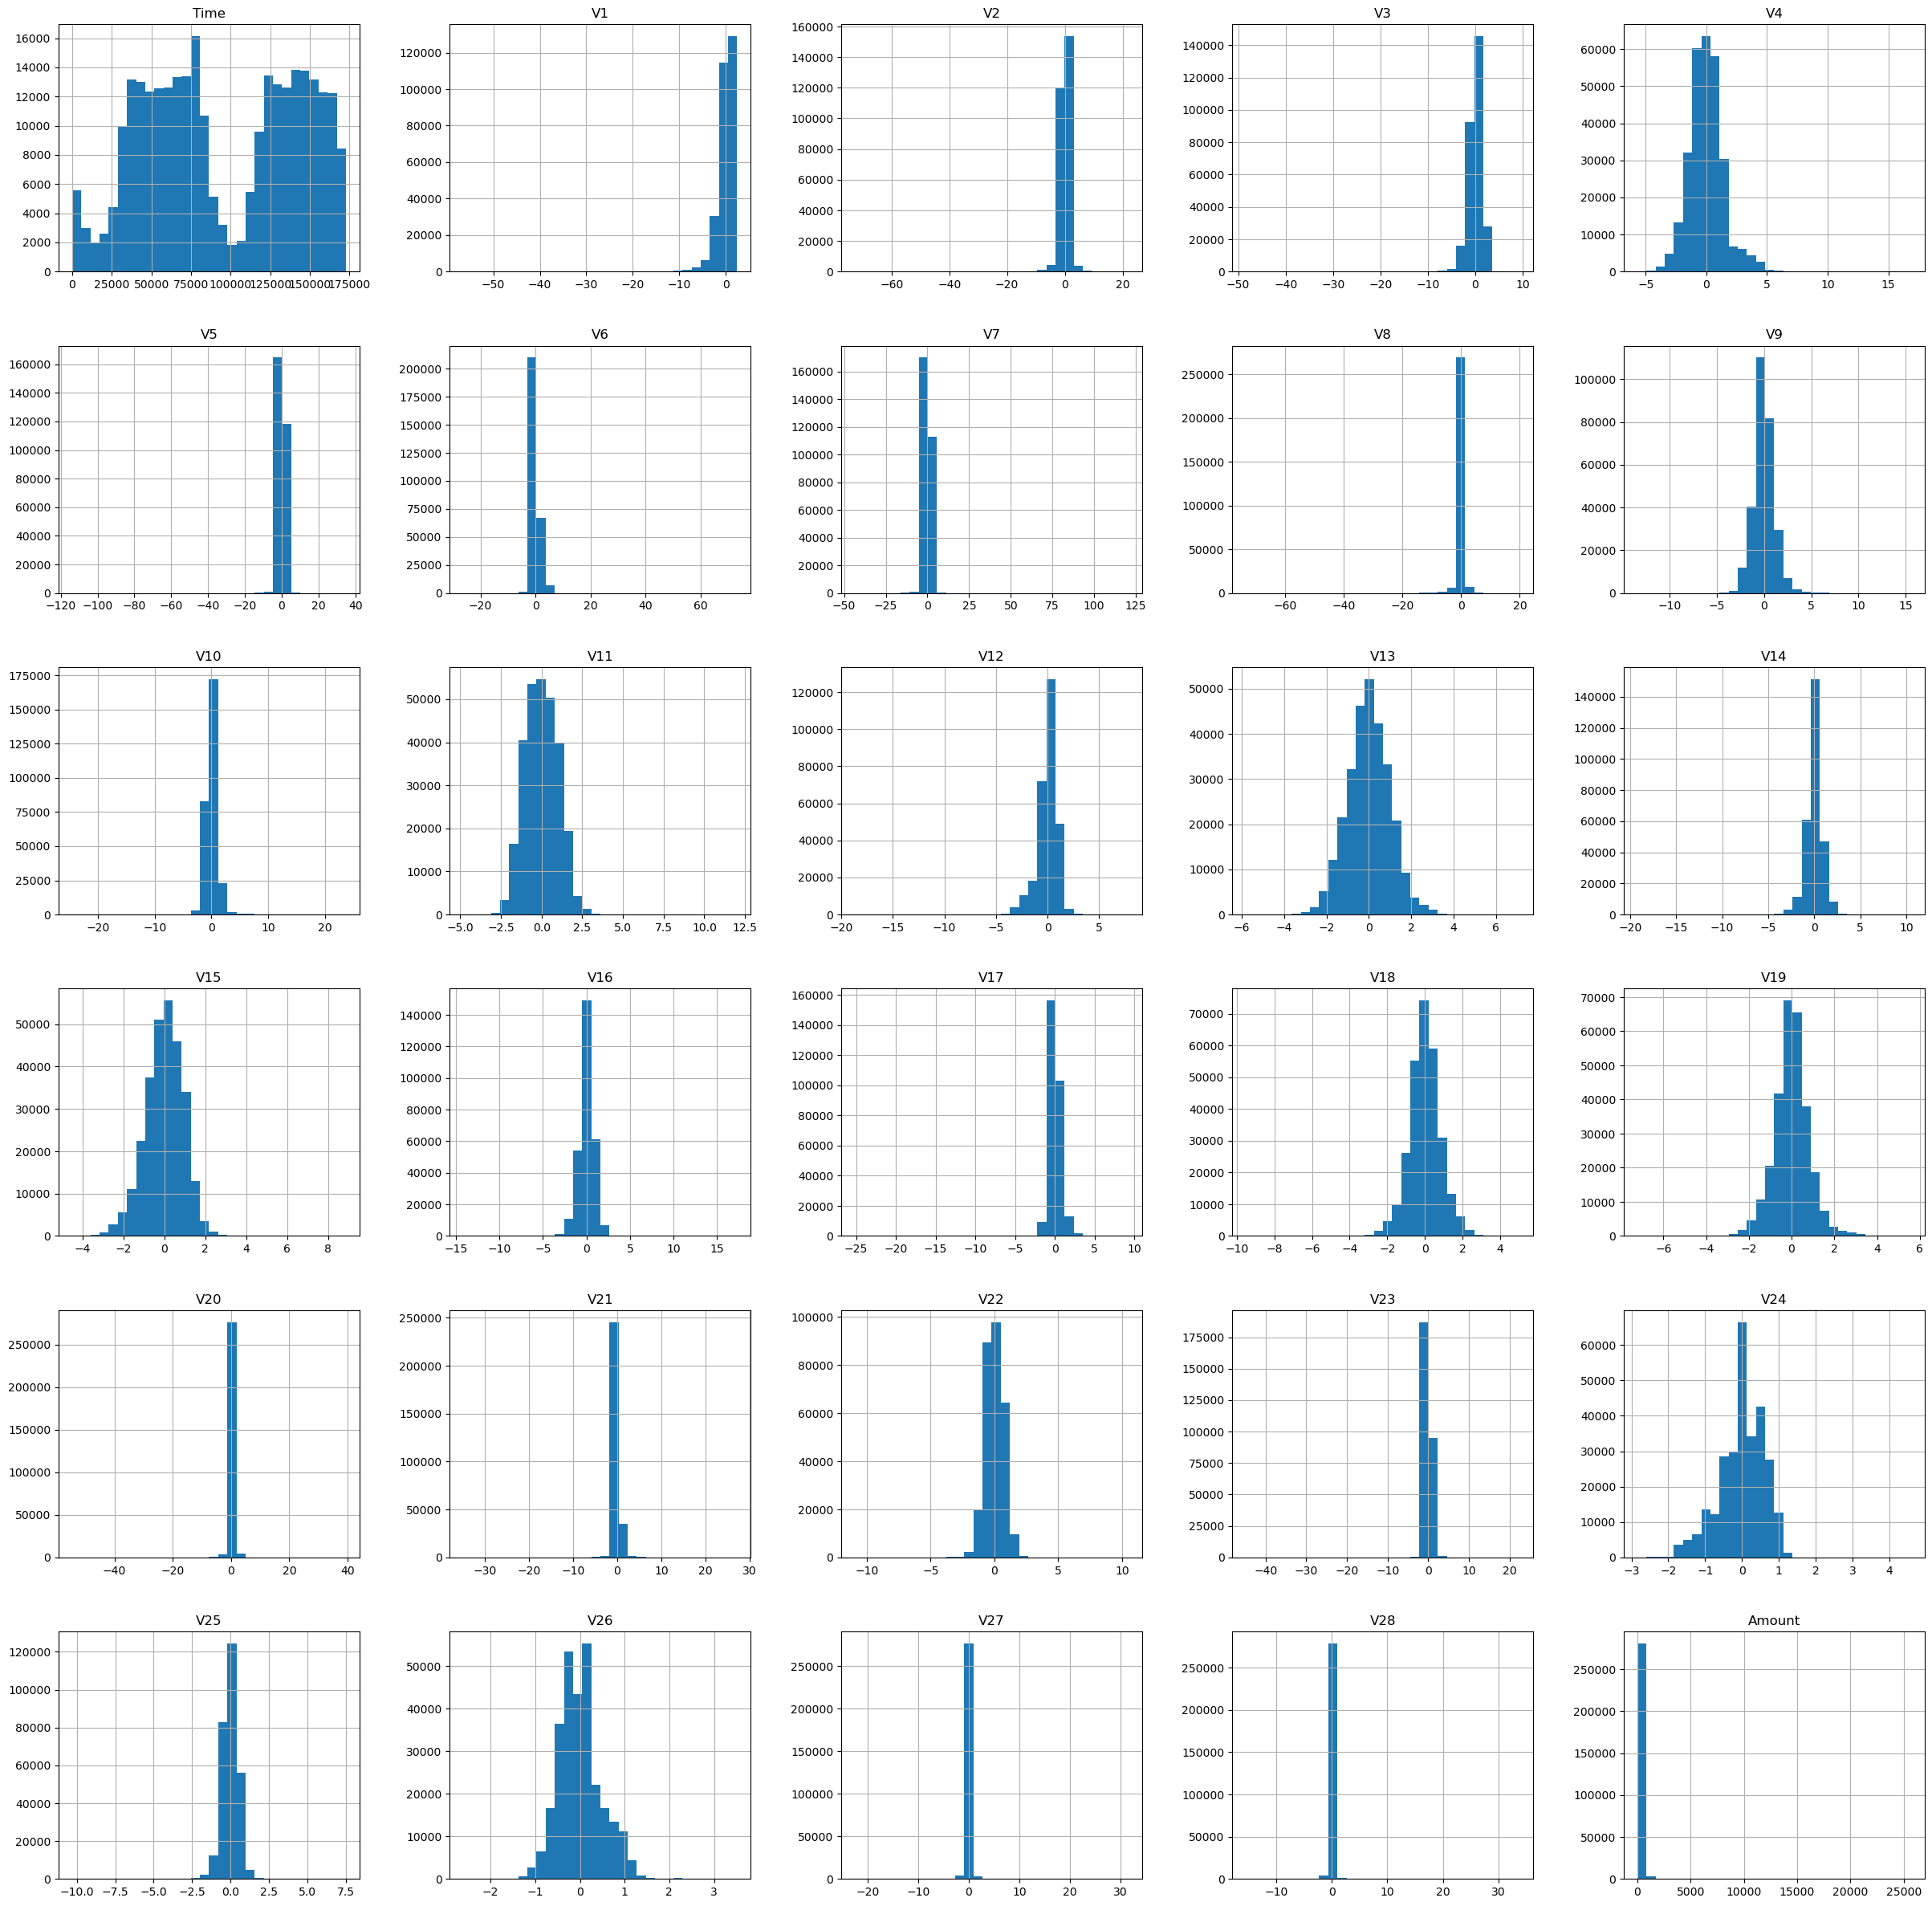

In [10]:
X.hist(bins=30,figsize=(30,30))

In [11]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X)

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:

smote = SMOTE()


X_resampled, y_resampled = smote.fit_resample(X_scaled, y)



In [14]:
y_resampled.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [15]:
X_resampled

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,0.263375,-2.046949,-1.865577,0.326565,2.840059,2.438556,0.330659,-0.112380,-0.485517,0.055414,...,-2.552166,-0.774803,1.842980,0.554443,-0.572753,-0.461638,0.733815,-0.774552,1.814690,-0.002705
568626,1.200176,0.580760,0.844057,-2.754002,1.863756,-0.238243,-1.385162,-1.313984,0.212147,-0.980322,...,0.380353,0.760147,0.586846,-0.229404,-0.439501,0.696767,-0.873468,1.257838,0.741506,-0.133402
568627,1.360602,0.669019,0.768056,-3.261643,1.067486,0.223494,-1.079109,-1.172881,0.189187,-0.830893,...,0.347059,0.510702,0.016071,-0.245431,-0.182716,0.963426,1.140815,1.010244,0.602773,-0.264065
568628,-1.392768,-14.722810,9.692987,-19.601753,4.563347,-15.207278,-3.665120,-15.872312,15.860657,-3.305080,...,2.219454,2.460690,-2.956485,-2.145119,0.283836,3.982256,-0.435984,3.198609,1.140943,0.046539


In [16]:
y_resampled

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split


X1_train, X1_test, y1_train, y1_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)




In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(X_resampled, y_resampled)
# testing
y_resampled_pred = model.predict(X1_test)


In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


In [18]:
print(classification_report(y1_test, y_resampled_pred))
print("F1 Score:",f1_score(y1_test, y_resampled_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

F1 Score: 0.9472592485705524


In [19]:
cnf_matrix = confusion_matrix(y1_test,y_resampled_pred)
np.set_printoptions(precision=2)

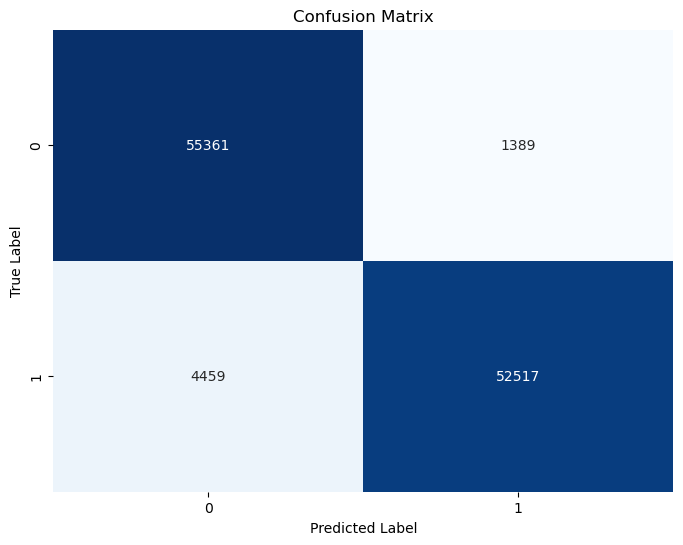

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10,11, 100,200,210,220],  # Regularization strength
    'penalty': ['l1', 'l2']  # Penalty type
}

grid_search_logistic = GridSearchCV(LogisticRegression(), param_grid_logistic, cv=5,scoring='recall')
grid_search_logistic.fit(X1_train, y1_train)

best_params_logistic = grid_search_logistic.best_params_

/Users/saadmomin/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/saadmomin/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/saadmomin/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/saadmomin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver 

In [23]:
best_params_logistic

{'C': 10, 'penalty': 'l2'}

In [24]:

best_C = best_params_logistic['C']
best_penalty = best_params_logistic['penalty']


best_logistic_model = LogisticRegression(C=best_C, penalty=best_penalty)

In [25]:

best_logistic_model.fit(X_resampled, y_resampled)


best_y_pred = best_logistic_model.predict(X1_test)


print(classification_report(y1_test, best_y_pred))
print("F1 Score:", f1_score(y1_test, best_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

F1 Score: 0.9474035400943184


In [26]:
cnf_matrix1 = confusion_matrix(y1_test,best_y_pred)
np.set_printoptions(precision=2)

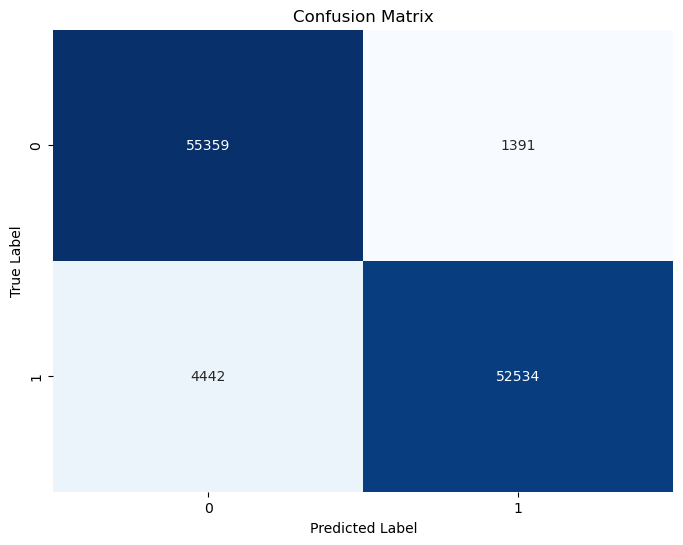

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix1, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [29]:
rf.fit(X1_train,y1_train)

RandomForestClassifier()

In [31]:
rf_y_pred = rf.predict(X1_test)

In [45]:

train_pred = rf.predict(X1_train)
train_accuracy = accuracy_score(y1_train, train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


In [32]:
print(classification_report(y1_test, rf_y_pred))
print("F1 Score:",f1_score(y1_test, rf_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

F1 Score: 0.9999210256140258


In [35]:
cnf_matrix2= confusion_matrix(y1_test,rf_y_pred)
np.set_printoptions(precision=2)
cnf_matrix2

array([[56741,     9],
       [    0, 56976]])

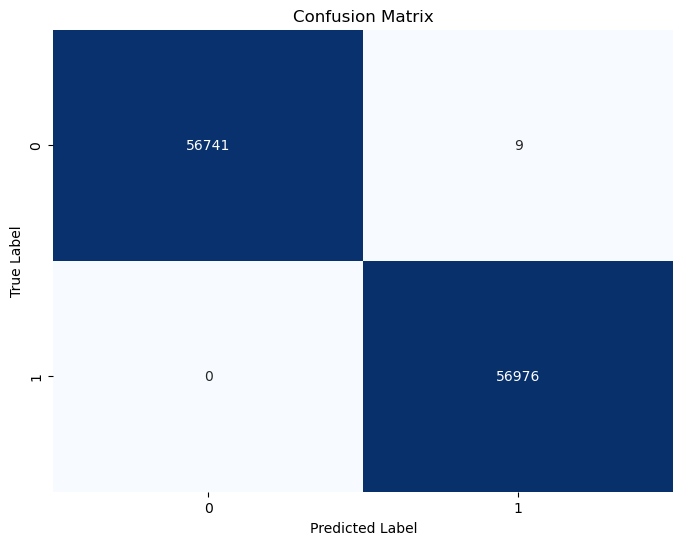

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix2, annot=True, cmap='Blues', fmt='d', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [37]:
import pickle

In [38]:
pickle.dump(scaler, open('scale1.pkl', 'wb'))
pickle.dump(rf, open('rfmodel1.pkl', 'wb'))

In [47]:
from sklearn.model_selection import  cross_val_score

In [48]:
cv_scores = cross_val_score(rf, X1_train, y1_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Average CV Score: 0.9998812936065835
